In [15]:
import requests
import re
from bs4 import BeautifulSoup
import time
import selenium
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.common.exceptions import NoSuchElementException        
from selenium.common.exceptions import StaleElementReferenceException  
from datetime import datetime      

# Set headers
headers = requests.utils.default_headers()
headers.update(
    {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

urls = [
    'https://www.sauto.cz/inzerce/osobni/bmw/m3'
]

driver = webdriver.Chrome()

def render_page(url):
    driver.get(url)
    time.sleep(3)
    r = driver.page_source
    # driver.quit()
    return r

def returnInt(value):
    return int(value.replace(" ", ""))

def getDatetime():
    now = datetime.now()
    return now.strftime("%Y-%m-%d %H:%M:%S")

r = render_page(urls[0])

soup = BeautifulSoup(r, "html.parser")

average = 0
value = ""
price = 0
sumTotal = 0
itemsTotal = 0
priceListTotal = 0
manufacturerListTotal = []
modelListTotal = []
mileageListTotal = []
yearManufacturedListTotal = []
datetimeListTotal = []

def scrapePrice():
    sum = 0
    items = 0
    priceList = []
    manufacturerList = []
    modelList = []
    mileageList = []
    yearManufacturedList = []
    datetimeList = []
    for i in soup.select('.price strong'):
        sum += returnInt(i.text)
        manufacturer = driver.find_elements_by_css_selector(".carBoxContent h1")[0].text
        manufacturerList.insert(items, manufacturer)
        model = driver.find_element_by_css_selector(".modelBox h1").text
        modelList.insert(items, model)
        yearManufactured = driver.find_elements_by_css_selector(".content dl")[items].find_elements_by_css_selector("dd")[1].text
        yearManufacturedList.insert(items, returnInt(yearManufactured))
        mileage = driver.find_elements_by_css_selector(".content dl")[items].find_elements_by_css_selector("dd")[2].text
        mileageList.insert(items, returnInt(re.sub("[^\\d]", "", mileage)))
        datetime = getDatetime()
        datetimeList.insert(items, datetime)
        priceList.insert(items, returnInt(i.text))
        items += 1
    result = (sum, items, priceList, manufacturerList, modelList, mileageList, yearManufacturedList, datetimeList)     
    return result

tuple = scrapePrice()
sumTotal = tuple[0]
itemsTotal = tuple[1]
priceListTotal = tuple[2]
manufacturerListTotal = tuple[3]
modelListTotal = tuple[4]
mileageListTotal = tuple[5]
yearManufacturedListTotal = tuple[6]
datetimeListTotal = tuple[7]

def check_exists_by_cssSelector(css):
    try:
        driver.find_element_by_css_selector(css)
    except NoSuchElementException:
        return False
    except StaleElementReferenceException:
        return False
    return True

elementString = "#nextPage"

while check_exists_by_cssSelector(elementString):
    driver.find_element_by_css_selector(elementString).click()
    time.sleep(3)
    r = render_page(driver.current_url)
    soup = BeautifulSoup(r, "html.parser")
    tuple = scrapePrice()
    sumTotal += tuple[0]
    itemsTotal += tuple[1]
    priceListTotal += tuple[2]
    manufacturerListTotal += tuple[3]
    modelListTotal += tuple[4]
    mileageListTotal += tuple[5]
    yearManufacturedListTotal += tuple[6]
    datetimeListTotal += tuple[7]

driver.quit()

average = sumTotal / itemsTotal

print("Items: " + str(itemsTotal))
print("Min: " + str(min(priceListTotal)))
print("Max: " + str(max(priceListTotal)))
print("Average: " + str(average))
if average > 100000:
  print("Nikdy na to nebudes mit prachy voe")
else:
    print("Tak na tenhle vrak mas!")

Items: 28
Min: 420000
Max: 3350000
Average: 1269906.2857142857
Nikdy na to nebudes mit prachy voe


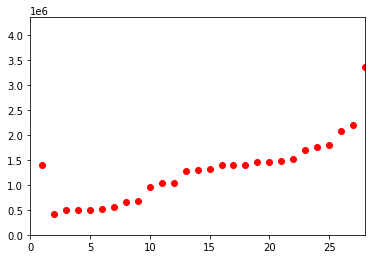

In [16]:
itemsListByIndex = []
for (i, item) in enumerate(priceListTotal, start=1):
    itemsListByIndex.append(i)

plt.plot(itemsListByIndex, priceListTotal, 'ro')
plt.axis([0, itemsTotal, 0, max(priceListTotal) + 1000000])
plt.show()

In [17]:
import pandas as pd

data = {'manufacturer': manufacturerListTotal,
        'model': modelListTotal,
        'price': priceListTotal,
        'mileage': mileageListTotal,
        'year_manufactured': yearManufacturedListTotal,
        'snaptime': datetimeListTotal}

df = pd.DataFrame(data)

print(df)

manufacturer model    price  mileage  year_manufactured  \
0           BMW    M3  1399000    36291               2016   
1           BMW    M3   420000   240000               2003   
2           BMW    M3   495000   209000               2002   
3           BMW    M3   499999   173542               2003   
4           BMW    M3   504000   189375               2003   
5           BMW    M3   519990   200000               1998   
6           BMW    M3   550000   133000               1997   
7           BMW    M3   649900   129050               2007   
8           BMW    M3   670000   181000               2009   
9           BMW    M3   950000   123580               2015   
10          BMW    M3  1030000   118900               2015   
11          BMW    M3  1040599   112933               2010   
12          BMW    M3  1269000    92500               2014   
13          BMW    M3  1299900    17900               2014   
14          BMW    M3  1319000    20040               2015   
15         